In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def file_opener(path, rtype):
    with open(path, rtype) as f:
        csv_arr = f.readlines()
        for row in range(1, len(csv_arr)):
            csv_arr[row] = csv_arr[row].split(',')
            csv_arr[row][0], csv_arr[row][1] = float(csv_arr[row][0]), float(csv_arr[row][1][:-1])
        csv_arr = csv_arr[1:]
    return csv_arr

In [3]:
csv_arr = file_opener("business_proj.csv", "r")
csv_valid = file_opener("task_test.csv", "r")
csv_arr = np.array(csv_arr, dtype=float)
x_train = csv_arr[:,0].reshape(csv_arr.shape[0], 1)
y_train = csv_arr[:,1]

In [4]:
zero_count, zero_summ = 0, 0
one_count, one_summ = 0, 0
for x in range(len(csv_arr)):
    if csv_arr[x][1] == 0.0:
        zero_count += 1
        zero_summ += csv_arr[x][0]
    else:
        one_count += 1
        one_summ += csv_arr[x][0]
if zero_count:
    zero_mean = zero_summ/zero_count
else: zero_mean = 0
if one_count:
    one_mean = one_summ/one_count
else: one_mean = 0

In [5]:
print(zero_mean, '\n', one_mean)

-0.01208069437659561 
 2.0437930561697337


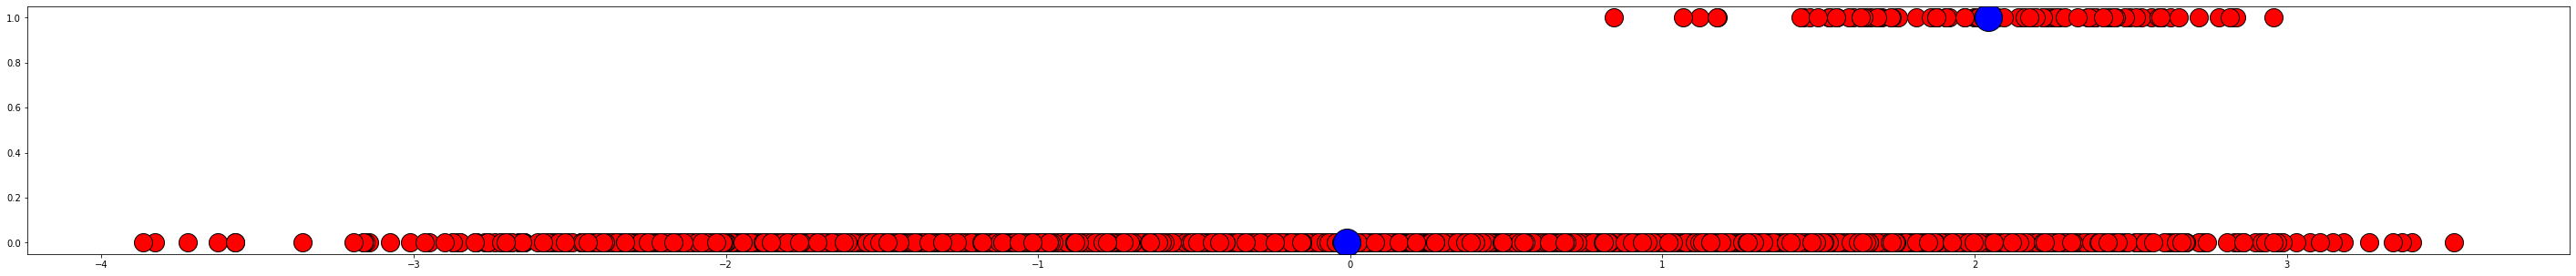

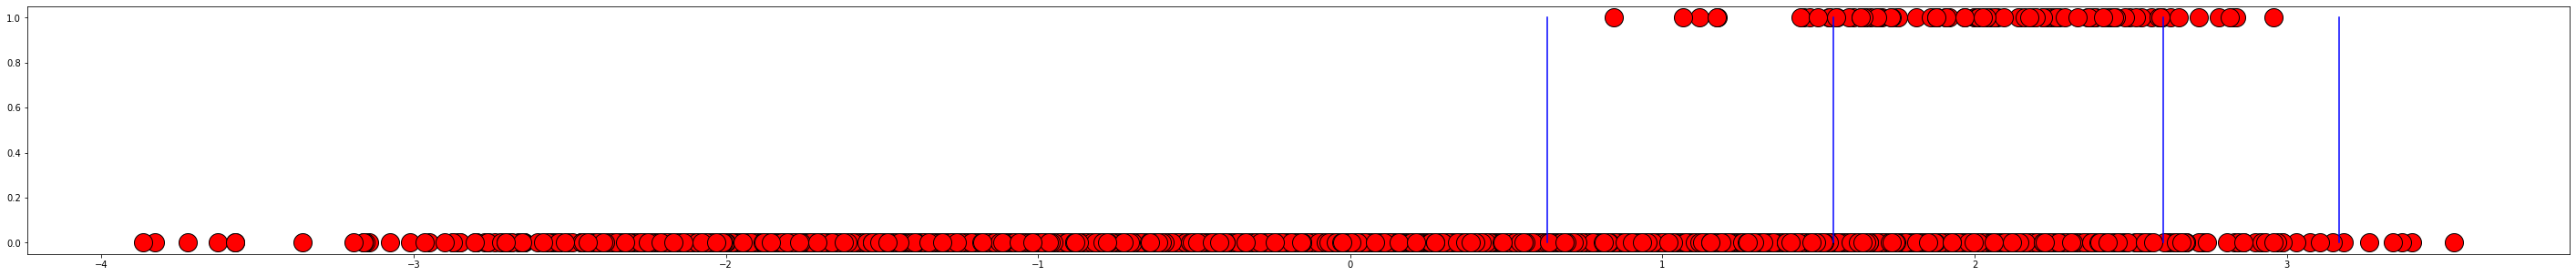

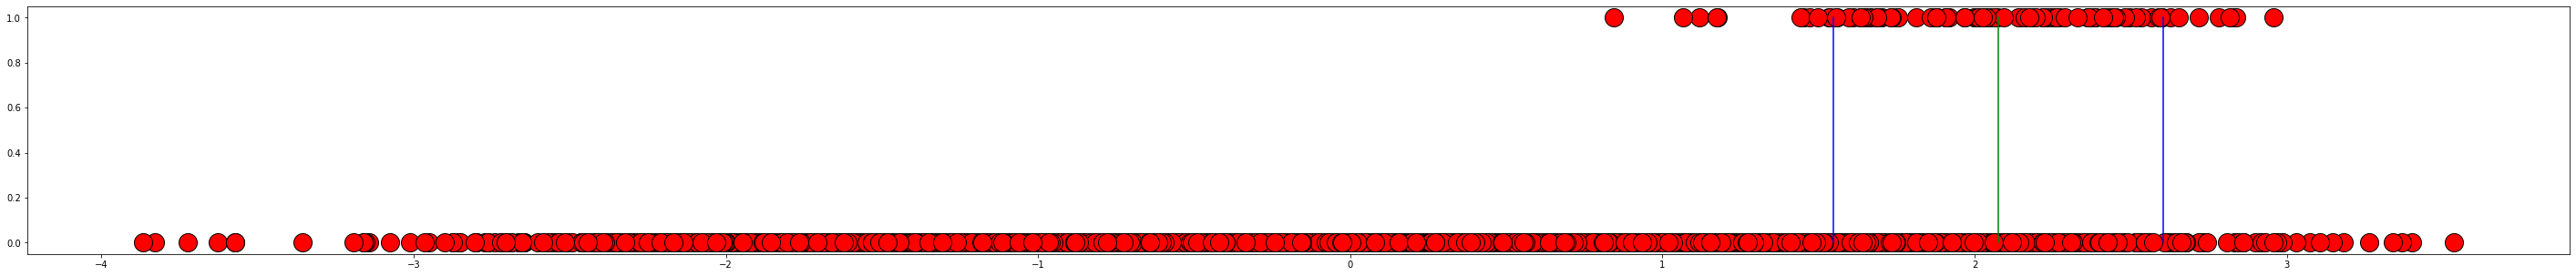

In [6]:
plt.figure(figsize=(50,5))
#plt.scatter(x_train, y_train, c=['r']*len(x_train))
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot([one_mean], [1], 'bo', ms=30, mec='k')
plt.plot([zero_mean], [0], 'bo', ms=30, mec='k')
ones = csv_arr[csv_arr[:, 1] == 1]
zeros = csv_arr[csv_arr[:, 1] == 0]
left_one_bound = min(ones[:,0])-(max(ones[:,0]) - min(ones[:,0]))/10
right_one_bound = max(ones[:,0])+(max(ones[:,0]) - min(ones[:,0]))/10

left_one_bound_80 = min(ones[:,0])+(max(ones[:,0]) - min(ones[:,0]))/3
right_one_bound_80 = max(ones[:,0])-(max(ones[:,0]) - min(ones[:,0]))/6

plt.figure(figsize=(50,5))
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot([left_one_bound, left_one_bound], [1, 0], 'b', ms=30, mec='k')
plt.plot([right_one_bound, right_one_bound], [1, 0], 'b', ms=30, mec='k')
plt.plot([left_one_bound_80, left_one_bound_80], [1, 0], 'b', ms=30, mec='k')
plt.plot([right_one_bound_80, right_one_bound_80], [1, 0], 'b', ms=30, mec='k')

plt.figure(figsize=(50,5))
one_center = (left_one_bound_80 + right_one_bound_80)/2
one_bound = (right_one_bound_80 - left_one_bound_80) / 2
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot([one_center-one_bound, one_center-one_bound], [1, 0], 'b', ms=30, mec='k')
plt.plot([one_center+one_bound, one_center+one_bound], [1, 0], 'b', ms=30, mec='k')
plt.plot([one_center, one_center], [1, 0], 'g', ms=30, mec='k')


In [7]:
def errors(x, y, line) -> float:
    c_0_left, c_0_right = len(x[(x<line)&(y==0)]), len(x[(x>=line)&(y==0)])
    c_1_left, c_1_right = len(x[(x<line)&(y==1)]), len(x[(x>=line)&(y==1)])
    err1 = (c_1_left+c_0_right)
    err2 = (c_0_left+c_1_right)
    return min(err1, err2)
    
#7-2
#7-5

#7-5
    
arr1 = np.array([1,   1,  0,  0,  1, 1, 0])
arr2 = np.array([-5, -4, -3, -2, -1, 0, 1])

assert errors(arr2, arr1, -3)== 2

arr1 = np.array([0,   0,  0,  0,  1, 1, 0])
arr2 = np.array([-5, -4, -3, -2, -1, 0, 1])

assert errors(arr2, arr1, -5)== 2

In [8]:
def find_bound(x_train, y_train, count) -> tuple:
    min_line, min_line_error = None, float('inf')
    it = (max(x_train) - min(x_train))/count
    for i in range(count):
        line = min(x_train)+it*i
        err = errors(x_train, y_train, line)
        if err < min_line_error:
            min_line = line
            min_line_error = err
    return min_line, min_line_error
    

In [9]:
print(x_train.shape, csv_arr.shape)

(10000, 1) (10000, 2)


100


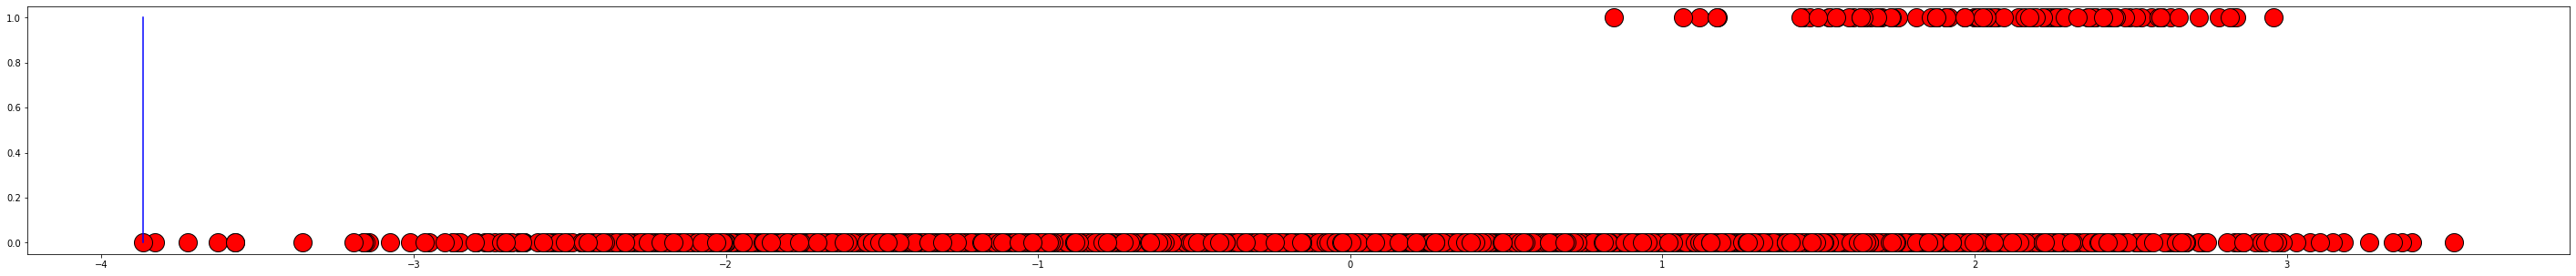

In [10]:
plt.figure(figsize=(50,5))
bnd = find_bound(x_train[:,0], y_train, 100)
plt.plot(x_train, y_train, 'ro', ms=20, mec='k')
plt.plot([bnd[0], bnd[0]], [1, 0], 'b', ms=30, mec='k')
print(bnd[1])